<a href="https://colab.research.google.com/github/arkache/Series-de-tiempo-taller/blob/main/taller_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
%matplotlib inline
plt.style.use("ggplot")


In [5]:
#leer archivo en formato de excel
df_3 = pd.read_excel("/content/Data.xlsx")

In [50]:
df_3

,Fecha (dd/mm/aaaa),Tasa de cambio representativa del mercado (TRM)
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
12001,2024-10-05,4173.66
12002,2024-10-06,4173.66
12003,2024-10-07,4173.66
12004,2024-10-08,4194.97


In [9]:
t = df_3 ['Fecha (dd/mm/aaaa)']

In [11]:
Ingresos = df_3 ['Tasa de cambio representativa del mercado (TRM)']

In [23]:
t

,Fecha (dd/mm/aaaa)
0,1991-11-27
1,1991-11-28
2,1991-11-29
3,1991-11-30
4,1991-12-01
...,...
12001,2024-10-05
12002,2024-10-06
12003,2024-10-07
12004,2024-10-08


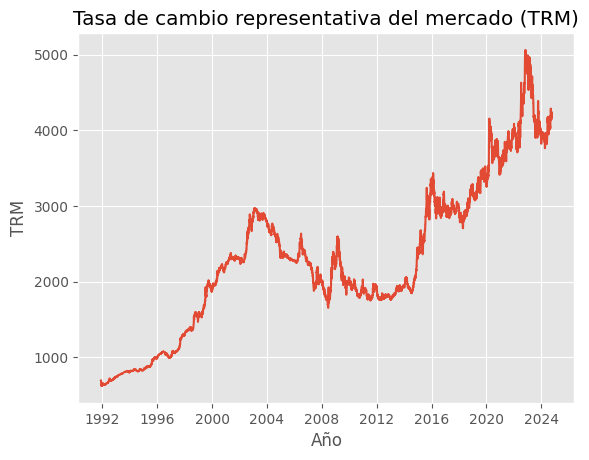

In [61]:
plt.plot(t,Ingresos)
plt.title('Tasa de cambio representativa del mercado (TRM)')
plt.xlabel('Año')
plt.ylabel('TRM')
plt.show()

,Fecha (dd/mm/aaaa),Tasa de cambio representativa del mercado (TRM)
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
12001,2024-10-05,4173.66
12002,2024-10-06,4173.66
12003,2024-10-07,4173.66
12004,2024-10-08,4194.97


In [53]:
df_3.columns = ['Fecha','Tasa de cambio representativa del mercado (TRM)']

In [55]:
df_3['Fecha']=pd.to_datetime(df_3['Fecha'])

In [58]:
df_sep_2013 = df_3[(df_3['Fecha'] >= '2013-09-01') & (df_3['Fecha'] <= '2013-09-30')]

In [59]:
df_sep_2013

,Fecha,Tasa de cambio representativa del mercado (TRM)
7949,2013-09-01,1935.43
7950,2013-09-02,1935.43
7951,2013-09-03,1935.43
7952,2013-09-04,1946.28
7953,2013-09-05,1938.99
7954,2013-09-06,1952.11
7955,2013-09-07,1947.99
7956,2013-09-08,1947.99
7957,2013-09-09,1947.99
7958,2013-09-10,1946.06


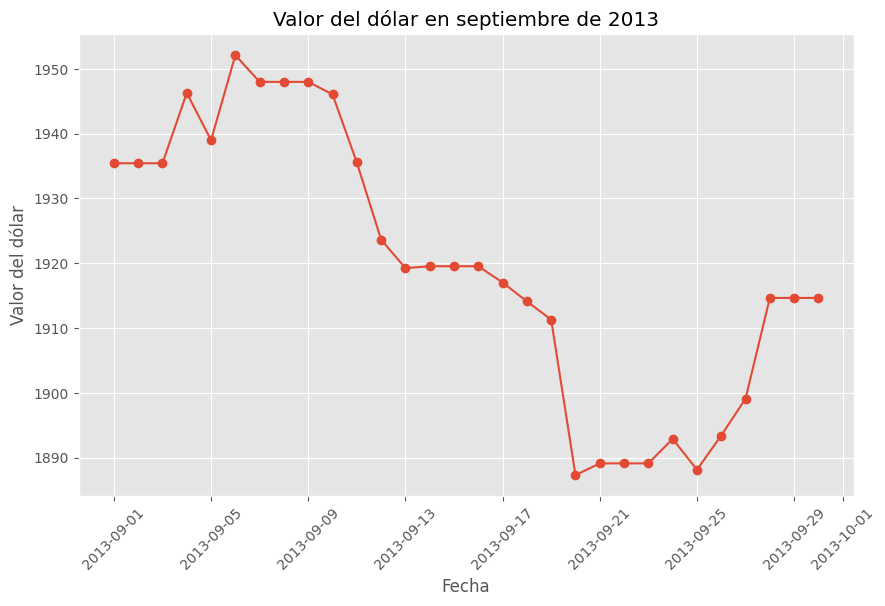

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(df_sep_2013['Fecha'], df_sep_2013['Tasa de cambio representativa del mercado (TRM)'], marker='o', linestyle='-')
plt.title('Valor del dólar en septiembre de 2013')
plt.xlabel('Fecha')
plt.ylabel('Valor del dólar')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 756.8941780856026


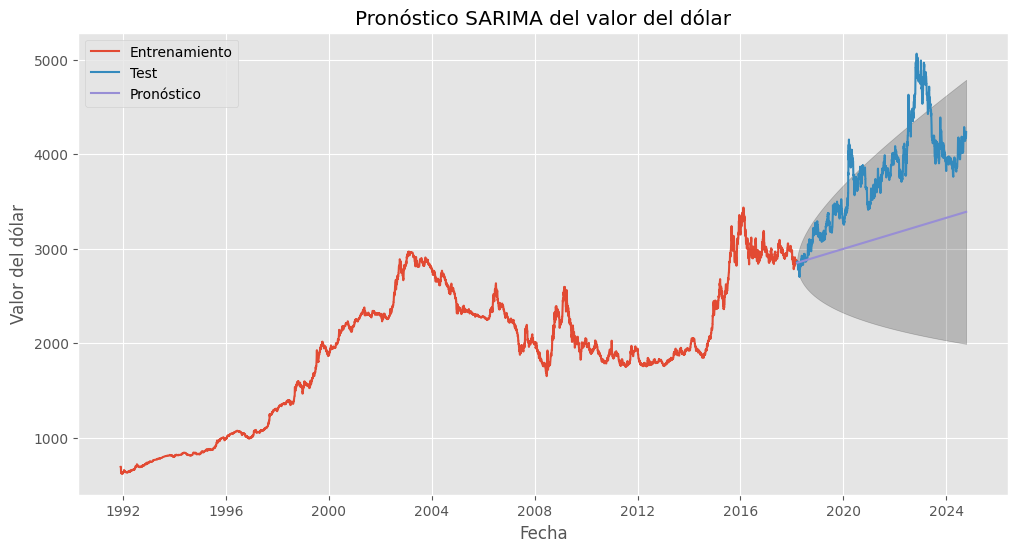

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

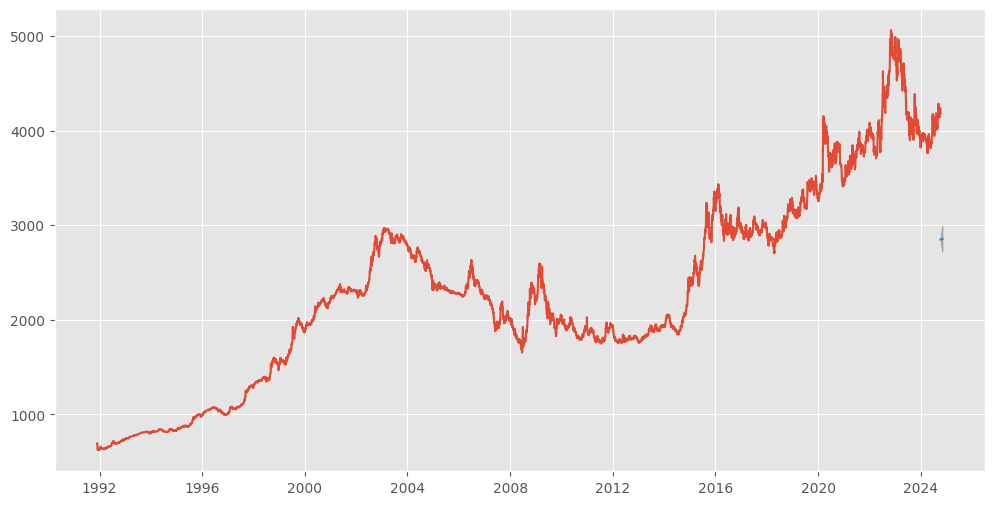

In [67]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Preparar los datos
df_3['Fecha'] = pd.to_datetime(df_3['Fecha'])
df_3.set_index('Fecha', inplace=True)
df_3.sort_index(inplace=True)

# Asegúrate de que estamos usando la columna correcta para el valor del dólar
valor_dolar_columna = 'Tasa de cambio representativa del mercado (TRM)'

# Dividir los datos en conjuntos de entrenamiento y prueba
train = df_3[:int(0.8*len(df_3))]
test = df_3[int(0.8*len(df_3)):]

# Ajustar el modelo SARIMA
model = SARIMAX(train[valor_dolar_columna],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer predicciones
forecast = results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

# Calcular el error RMSE
rmse = sqrt(mean_squared_error(test[valor_dolar_columna], forecast_mean))
print(f'RMSE: {rmse}')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train[valor_dolar_columna], label='Entrenamiento')
plt.plot(test.index, test[valor_dolar_columna], label='Test')
plt.plot(test.index, forecast_mean, label='Pronóstico')
plt.fill_between(test.index,
                 forecast.conf_int()[f'lower {valor_dolar_columna}'],
                 forecast.conf_int()[f'upper {valor_dolar_columna}'],
                 color='k', alpha=.2)
plt.title('Pronóstico SARIMA del valor del dólar')
plt.xlabel('Fecha')
plt.ylabel('Valor del dólar')
plt.legend()
plt.grid(True)
plt.show()

# Pronosticar para los próximos 30 días
future_forecast = results.get_forecast(steps=30)
future_forecast_mean = future_forecast.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(df_3.index, df_3[valor_dolar_columna], label='Datos históricos')
plt.plot(pd.date_range(start=df_3.index[-1], periods=31)[1:], future_forecast_mean, label='Pronóstico')
plt.fill_between(pd.date_range(start=df_3.index[-1], periods=31)[1:],
                 future_forecast.conf_int()[f'lower {valor_dolar_columna}'],
                 future_forecast.conf_int()[f'upper {valor_dolar_columna}'],
                 color='k', alpha=.2)
plt

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo3re6x_0/pxlp3dai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo3re6x_0/mbuweef5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62513', 'data', 'file=/tmp/tmpo3re6x_0/pxlp3dai.json', 'init=/tmp/tmpo3re6x_0/mbuweef5.json', 'output', 'file=/tmp/tmpo3re6x_0/prophet_model0vi3wlta/prophet_model-20241010025238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:52:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:52:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


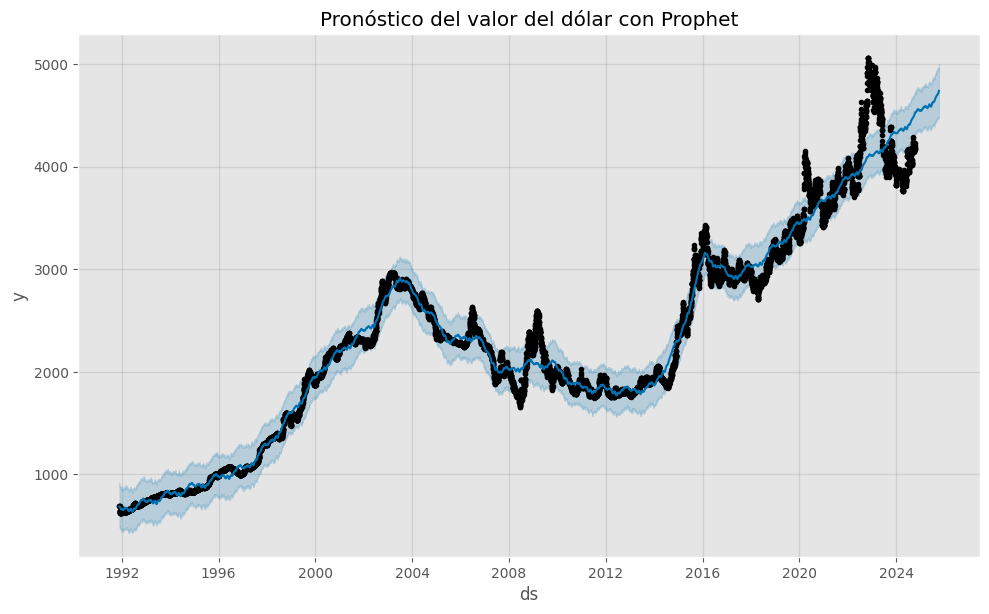

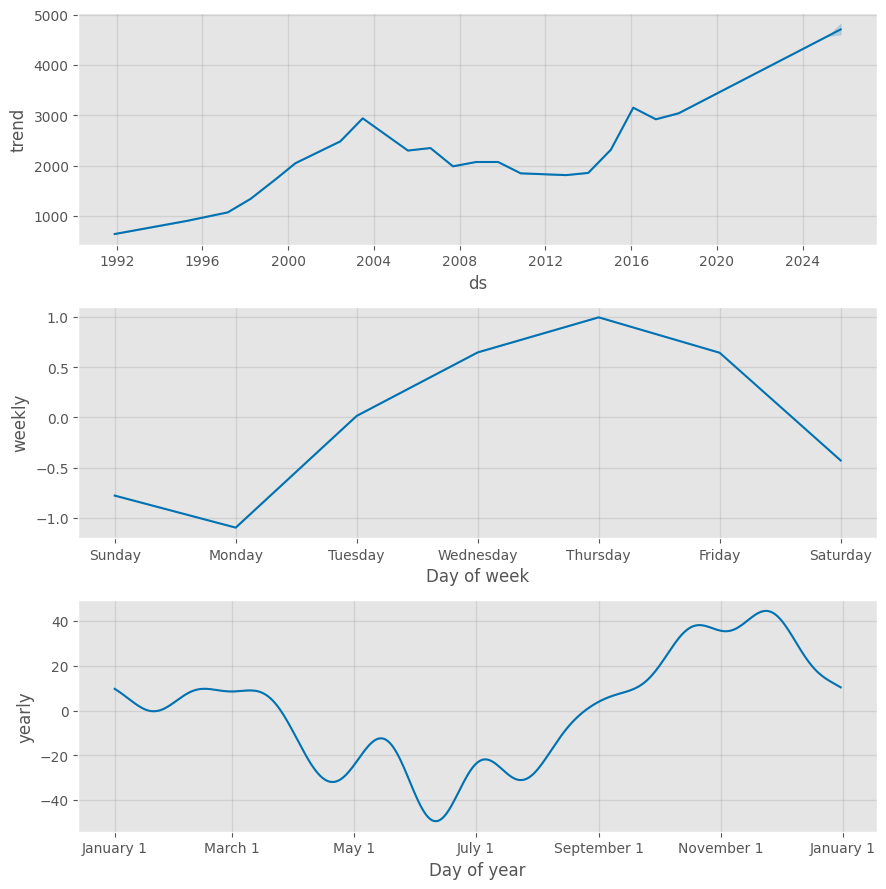

In [71]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Preparar los datos para Prophet
df_prophet = df_3.reset_index().rename(columns={'Fecha': 'ds', 'Tasa de cambio representativa del mercado (TRM)': 'y'})

# Crear y ajustar el modelo
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)

# Crear dataframe para pronóstico futuro
future = model.make_future_dataframe(periods=365)  # Pronóstico para 1 año

# Hacer predicciones
forecast = model.predict(future)

# Graficar los resultados
fig1 = model.plot(forecast)
plt.title('Pronóstico del valor del dólar con Prophet')
plt.show()

# Graficar los componentes del pronóstico
fig2 = model.plot_components(forecast)
plt.show()